In [2]:
import pandas as pd
import numpy as np

In [6]:
pd.options.display.max_columns = None #show all columns

In [3]:
loan_data_backup = pd.read_csv('loan_data_2007_2014.csv')

/opt/anaconda3/lib/python3.9/site-packages/IPython/core/interactiveshell.py:3444: DtypeWarning: Columns (20) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [118]:
loan_data = loan_data_backup.copy()

In [119]:
loan_data.head()

,Unnamed: 0,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_il_6m,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m
0,0,1077501,1296599,5000,5000,4975.0,36 months,10.65,162.87,B,B2,NaN,10+ years,RENT,24000.0,Verified,Dec-11,Fully Paid,n,https://www.lendingclub.com/browse/loanDetail....,Borrower added on 12/22/11 > I need to upgra...,credit_card,Computer,860xx,AZ,27.65,0.0,Jan-85,1.0,NaN,NaN,3.0,0.0,13648,83.7,9.0,f,0.0,0.0,5861.071414,5831.78,5000.00,861.07,0.00,0.00,0.00,Jan-15,171.62,NaN,Jan-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,1077430,1314167,2500,2500,2500.0,60 months,15.27,59.83,C,C4,Ryder,< 1 year,RENT,30000.0,Source Verified,Dec-11,Charged Off,n,https://www.lendingclub.com/browse/loanDetail....,Borrower added on 12/22/11 > I plan to use t...,car,bike,309xx,GA,1.00,0.0,Apr-99,5.0,NaN,NaN,3.0,0.0,1687,9.4,4.0,f,0.0,0.0,1008.710000,1008.71,456.46,435.17,0.00,117.08,1.11,Apr-13,119.66,NaN,Sep-13,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,1077175,1313524,2400,2400,2400.0,36 months,15.96,84.33,C,C5,NaN,10+ years,RENT,12252.0,Not Verified,Dec-11,Fully Paid,n,https://www.lendingclub.com/browse/loanDetail....,NaN,small_business,real estate business,606xx,IL,8.72,0.0,Nov-01,2.0,NaN,NaN,2.0,0.0,2956,98.5,10.0,f,0.0,0.0,3003.653644,3003.65,2400.00,603.65,0.00,0.00,0.00,Jun-14,649.91,NaN,Jan-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3,1076863,1277178,10000,10000,10000.0,36 months,13.49,339.31,C,C1,AIR RESOURCES BOARD,10+ years,RENT,49200.0,Source Verified,Dec-11,Fully Paid,n,https://www.lendingclub.com/browse/loanDetail....,Borrower added on 12/21/11 > to pay for prop...,other,personel,917xx,CA,20.00,0.0,Feb-96,1.0,35.0,NaN,10.0,0.0,5598,21.0,37.0,f,0.0,0.0,12226.302210,12226.30,10000.00,2209.33,16.97,0.00,0.00,Jan-15,357.48,NaN,Jan-15,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4,1075358,1311748,3000,3000,3000.0,60 months,12.69,67.79,B,B5,University Medical Group,1 year,RENT,80000.0,Source Verified,Dec-11,Current,n,https://www.lendingclub.com/browse/loanDetail....,Borrower added on 12/21/11 > I plan on combi...,other,Personal,972xx,OR,17.94,0.0,Jan-96,0.0,38.0,NaN,15.0,0.0,27783,53.9,38.0,f,766.9,766.9,3242.170000,3242.17,2233.10,1009.07,0.00,0.00,0.00,Jan-16,67.79,Feb-16,Jan-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [120]:
loan_data.shape

(466285, 75)

In [121]:
loan_data.columns.values

array(['Unnamed: 0', 'id', 'member_id', 'loan_amnt', 'funded_amnt',
       'funded_amnt_inv', 'term', 'int_rate', 'installment', 'grade',
       'sub_grade', 'emp_title', 'emp_length', 'home_ownership',
       'annual_inc', 'verification_status', 'issue_d', 'loan_status',
       'pymnt_plan', 'url', 'desc', 'purpose', 'title', 'zip_code',
       'addr_state', 'dti', 'delinq_2yrs', 'earliest_cr_line',
       'inq_last_6mths', 'mths_since_last_delinq',
       'mths_since_last_record', 'open_acc', 'pub_rec', 'revol_bal',
       'revol_util', 'total_acc', 'initial_list_status', 'out_prncp',
       'out_prncp_inv', 'total_pymnt', 'total_pymnt_inv',
       'total_rec_prncp', 'total_rec_int', 'total_rec_late_fee',
       'recoveries', 'collection_recovery_fee', 'last_pymnt_d',
       'last_pymnt_amnt', 'next_pymnt_d', 'last_credit_pull_d',
       'collections_12_mths_ex_med', 'mths_since_last_major_derog',
       'policy_code', 'application_type', 'annual_inc_joint', 'dti_joint',
       'veri

In [122]:
loan_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 466285 entries, 0 to 466284
Data columns (total 75 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   Unnamed: 0                   466285 non-null  int64  
 1   id                           466285 non-null  int64  
 2   member_id                    466285 non-null  int64  
 3   loan_amnt                    466285 non-null  int64  
 4   funded_amnt                  466285 non-null  int64  
 5   funded_amnt_inv              466285 non-null  float64
 6   term                         466285 non-null  object 
 7   int_rate                     466285 non-null  float64
 8   installment                  466285 non-null  float64
 9   grade                        466285 non-null  object 
 10  sub_grade                    466285 non-null  object 
 11  emp_title                    438697 non-null  object 
 12  emp_length                   445277 non-null  object 
 13 

## Data Preprocessing

#### Note that term and emp_length are currently objects when they should be numeric

#### Fixing emp_length

In [123]:
loan_data['emp_length'].unique()

array(['10+ years', '< 1 year', '1 year', '3 years', '8 years', '9 years',
       '4 years', '5 years', '6 years', '2 years', '7 years', nan],
      dtype=object)

In [124]:
#use string replace to fix one issue at a time so that each result is simply a number
loan_data['emp_length_int'] = loan_data['emp_length'].str.replace('\+ years','')
loan_data['emp_length_int'] = loan_data['emp_length_int'].str.replace('< 1 year', str(0))
loan_data['emp_length_int'] = loan_data['emp_length_int'].str.replace('n/a', str(0))
loan_data['emp_length_int'] = loan_data['emp_length_int'].str.replace(' years','')
loan_data['emp_length_int'] = loan_data['emp_length_int'].str.replace(' year','')

/var/folders/yl/mzd266cs0ng0hjh0c8qkbzn40000gn/T/ipykernel_76367/831641360.py:2: FutureWarning: The default value of regex will change from True to False in a future version.
  loan_data['emp_length_int'] = loan_data['emp_length'].str.replace('\+ years','')


In [125]:
loan_data['emp_length_int'].unique()

array(['10', '0', '1', '3', '8', '9', '4', '5', '6', '2', '7', nan],
      dtype=object)

In [126]:
loan_data['emp_length_int'] = pd.to_numeric(loan_data['emp_length_int'])

In [127]:
type(loan_data['emp_length_int'][0])

numpy.float64

#### Fixing 'term' variable the same way

#### Fixing Strings that should be dates

In [128]:
loan_data['earliest_cr_line']

0         Jan-85
1         Apr-99
2         Nov-01
3         Feb-96
4         Jan-96
           ...  
466280    Apr-03
466281    Jun-97
466282    Dec-01
466283    Feb-03
466284    Feb-00
Name: earliest_cr_line, Length: 466285, dtype: object

In [129]:
loan_data['earliest_cr_line_date'] = pd.to_datetime(loan_data['earliest_cr_line'], format = '%b-%y')

In [130]:
type(loan_data['earliest_cr_line_date'][0])

pandas._libs.tslibs.timestamps.Timestamp

In [131]:
#set reference date to calculate the time that has passed
pd.to_datetime('2017-12-01') - loan_data['earliest_cr_line_date']

0        12022 days
1         6819 days
2         5874 days
3         7974 days
4         8005 days
            ...    
466280    5358 days
466281    7488 days
466282    5844 days
466283    5417 days
466284    6513 days
Name: earliest_cr_line_date, Length: 466285, dtype: timedelta64[ns]

In [132]:
loan_data['mths_since_earliest_cr_line'] = round(pd.to_numeric((pd.to_datetime('2017-12-01') - loan_data['earliest_cr_line_date'])/np.timedelta64(1,'M')))

In [133]:
loan_data['mths_since_earliest_cr_line'].head()

0    395.0
1    224.0
2    193.0
3    262.0
4    263.0
Name: mths_since_earliest_cr_line, dtype: float64

In [134]:
loan_data['mths_since_earliest_cr_line'].describe()


count    466256.000000
mean        239.482430
std          93.974829
min        -612.000000
25%         183.000000
50%         225.000000
75%         285.000000
max         587.000000
Name: mths_since_earliest_cr_line, dtype: float64

In [135]:
#need to address the negative time differences
#find affected rows and columns using df.loc()
loan_data.loc[:,['earliest_cr_line','earliest_cr_line_date','mths_since_earliest_cr_line']][loan_data['mths_since_earliest_cr_line'] < 0]


,earliest_cr_line,earliest_cr_line_date,mths_since_earliest_cr_line
1580,Sep-62,2062-09-01,-537.0
1770,Sep-68,2068-09-01,-609.0
2799,Sep-64,2064-09-01,-561.0
3282,Sep-67,2067-09-01,-597.0
3359,Feb-65,2065-02-01,-566.0
...,...,...,...
464003,Jan-68,2068-01-01,-601.0
464260,Jul-66,2066-07-01,-583.0
465100,Oct-67,2067-10-01,-598.0
465500,Sep-67,2067-09-01,-597.0


In [136]:
#assign rows with negative values to be equal to the maximum months since earliest credit line
loan_data['mths_since_earliest_cr_line'][loan_data['mths_since_earliest_cr_line'] < 0 ] = loan_data['mths_since_earliest_cr_line'].max()


/var/folders/yl/mzd266cs0ng0hjh0c8qkbzn40000gn/T/ipykernel_76367/647820910.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  loan_data['mths_since_earliest_cr_line'][loan_data['mths_since_earliest_cr_line'] < 0 ] = loan_data['mths_since_earliest_cr_line'].max()


In [137]:
#Now the minimum is 73 months, a positive number
loan_data['mths_since_earliest_cr_line'].min()

73.0

#### Process issue_dt variable the same way

### Preprocessing Discrete Variables

#### Create dummy variables to numerically encode categorical variables
- We need k-1 dummy variables to represent all information about k categories. So we need 2 dummy variables if there are 3 categories in the variable

#### 'Grade' variable

In [138]:
pd.get_dummies(loan_data['grade'])
#newly create variables have the same name as the categories

,A,B,C,D,E,F,G
0,0,1,0,0,0,0,0
1,0,0,1,0,0,0,0
2,0,0,1,0,0,0,0
3,0,0,1,0,0,0,0
4,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...
466280,0,0,1,0,0,0,0
466281,0,0,0,1,0,0,0
466282,0,0,0,1,0,0,0
466283,1,0,0,0,0,0,0


In [139]:
pd.get_dummies(loan_data['grade'], prefix= 'Grade', prefix_sep = ': ')

,Grade: A,Grade: B,Grade: C,Grade: D,Grade: E,Grade: F,Grade: G
0,0,1,0,0,0,0,0
1,0,0,1,0,0,0,0
2,0,0,1,0,0,0,0
3,0,0,1,0,0,0,0
4,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...
466280,0,0,1,0,0,0,0
466281,0,0,0,1,0,0,0
466282,0,0,0,1,0,0,0
466283,1,0,0,0,0,0,0


In [140]:
#assign all dummy variables for all categories as a list
loan_data_dummies = [pd.get_dummies(loan_data['grade'], prefix= 'grade', prefix_sep = ': '),
                     pd.get_dummies(loan_data['sub_grade'], prefix= 'sub_grade', prefix_sep = ': '),
                     pd.get_dummies(loan_data['home_ownership'], prefix= 'home_ownership', prefix_sep = ': '),
                     pd.get_dummies(loan_data['verification_status'], prefix= 'verification_status', prefix_sep = ': '),
                     pd.get_dummies(loan_data['loan_status'], prefix= 'loan_status', prefix_sep = ': '),
                     pd.get_dummies(loan_data['purpose'], prefix= 'purpose', prefix_sep = ': '),
                     pd.get_dummies(loan_data['addr_state'], prefix= 'addr_state', prefix_sep = ': '),
                     pd.get_dummies(loan_data['initial_list_status'], prefix= 'initial_list_status', prefix_sep = ': ')]
                    
                    

In [141]:
loan_data_dummies[1]

,sub_grade: A1,sub_grade: A2,sub_grade: A3,sub_grade: A4,sub_grade: A5,sub_grade: B1,sub_grade: B2,sub_grade: B3,sub_grade: B4,sub_grade: B5,sub_grade: C1,sub_grade: C2,sub_grade: C3,sub_grade: C4,sub_grade: C5,sub_grade: D1,sub_grade: D2,sub_grade: D3,sub_grade: D4,sub_grade: D5,sub_grade: E1,sub_grade: E2,sub_grade: E3,sub_grade: E4,sub_grade: E5,sub_grade: F1,sub_grade: F2,sub_grade: F3,sub_grade: F4,sub_grade: F5,sub_grade: G1,sub_grade: G2,sub_grade: G3,sub_grade: G4,sub_grade: G5
0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
466280,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
466281,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
466282,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
466283,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [142]:
#Use pd.concat() to make it a dataframe
loan_data_dummies = pd.concat(loan_data_dummies, axis = 1)

In [143]:
type(loan_data_dummies)

pandas.core.frame.DataFrame

In [144]:
#concatenate dummy variables to our core dataframe
loan_data = pd.concat([loan_data, loan_data_dummies], axis=1)

In [145]:
loan_data.columns.values

array(['Unnamed: 0', 'id', 'member_id', 'loan_amnt', 'funded_amnt',
       'funded_amnt_inv', 'term', 'int_rate', 'installment', 'grade',
       'sub_grade', 'emp_title', 'emp_length', 'home_ownership',
       'annual_inc', 'verification_status', 'issue_d', 'loan_status',
       'pymnt_plan', 'url', 'desc', 'purpose', 'title', 'zip_code',
       'addr_state', 'dti', 'delinq_2yrs', 'earliest_cr_line',
       'inq_last_6mths', 'mths_since_last_delinq',
       'mths_since_last_record', 'open_acc', 'pub_rec', 'revol_bal',
       'revol_util', 'total_acc', 'initial_list_status', 'out_prncp',
       'out_prncp_inv', 'total_pymnt', 'total_pymnt_inv',
       'total_rec_prncp', 'total_rec_int', 'total_rec_late_fee',
       'recoveries', 'collection_recovery_fee', 'last_pymnt_d',
       'last_pymnt_amnt', 'next_pymnt_d', 'last_credit_pull_d',
       'collections_12_mths_ex_med', 'mths_since_last_major_derog',
       'policy_code', 'application_type', 'annual_inc_joint', 'dti_joint',
       'veri

### Checking for missing values & Cleaning Data

In [148]:
pd.options.display.max_rows = None #show all rows
loan_data.isnull() #returns True for a missing value
loan_data.isnull().sum() #Total null records for each column

Unnamed: 0                                                               0
id                                                                       0
member_id                                                                0
loan_amnt                                                                0
funded_amnt                                                              0
funded_amnt_inv                                                          0
term                                                                     0
int_rate                                                                 0
installment                                                              0
grade                                                                    0
sub_grade                                                                0
emp_title                                                            27588
emp_length                                                           21008
home_ownership           

In [149]:
pd.options.display.max_rows = 100

In [150]:
loan_data['total_rev_hi_lim'].fillna(loan_data['funded_amnt'], inplace = True) #if we don't have data, assume it is equal to funded amt of loan


In [151]:
loan_data['total_rev_hi_lim'].isnull().sum() #validate there are no more missing variables

0

In [156]:
#filling na values with the mean for annual income
loan_data['annual_inc'].fillna(loan_data['annual_inc'].mean(),inplace = True)

In [167]:
#Setting nulls to 0 for these columns
var_list = ['mths_since_earliest_cr_line','acc_now_delinq','total_acc','pub_rec']

for var in var_list:
    loan_data[var].fillna(0, inplace = True)
    print("The column '{}' has {} null values".format(var, loan_data[var].isnull().sum()))

The column 'mths_since_earliest_cr_line' has 0 null values
The column 'acc_now_delinq' has 0 null values
The column 'total_acc' has 0 null values
The column 'pub_rec' has 0 null values


In [160]:
#check
loan_data['mths_since_earliest_cr_line'].isnull().sum()


0

## Preparing the PD Model

### Approach
#### 0 = a default or bad loan, 1 = good loan
Logistic regression estimates the relationship between : 
1) the logarithm of odds ratio of defaults / non-defaults and 
2) a linear combination of predictors or independent variables

Interpretability is key for the PD model
All independent variables should be dummy or binary categorical variables. This means we need to turn continuous numeric variables into dummy variables

#### Dependent Variable Definition

In [169]:
loan_data['loan_status'].unique()

array(['Fully Paid', 'Charged Off', 'Current', 'Default',
       'Late (31-120 days)', 'In Grace Period', 'Late (16-30 days)',
       'Does not meet the credit policy. Status:Fully Paid',
       'Does not meet the credit policy. Status:Charged Off'],
      dtype=object)

In [172]:
loan_data['loan_status'].value_counts() / loan_data['loan_status'].count()

Current                                                0.480878
Fully Paid                                             0.396193
Charged Off                                            0.091092
Late (31-120 days)                                     0.014798
In Grace Period                                        0.006747
Does not meet the credit policy. Status:Fully Paid     0.004263
Late (16-30 days)                                      0.002612
Default                                                0.001784
Does not meet the credit policy. Status:Charged Off    0.001632
Name: loan_status, dtype: float64

In [173]:
# we want to set good to 1 and bad to 0, so that positive coefficients mean a better account
loan_data['good_bad'] = np.where(loan_data['loan_status'].isin(['Charged Off',
                                                                'Default',
                                                                'Late (31-120 days)',
                                                                'Does not meet the credit policy. Status:Charged Off']),0,1)
                                 

In [175]:
loan_data['good_bad'].value_counts()

1    415317
0     50968
Name: good_bad, dtype: int64

### Independent Variable Preparation - Fine Classing, Weight of Evidence, and Coarse Classing

- **Fine Classing** - Turning discrete and numeric variables into many categories based on their properties

- **Weight of Evidence** - shows the extent that an independent variable predicts the dependent variable. It shows how much evidence a category of an independent variable brings in explaining the dependent variable. 
    - WoE is used to determine what the cutoffs should be for categories of each independent variable
    - WoE for a category = natural logarithm ln of (WoE for the % of all goods in the category / WoE for the % of all bads in the category) 
    - A WoE that is farther away from 0 means more predictive power for that variable

- **Coarse Classing** - Taking the fine class categories for each variable and aggregating into fewer categories based on Weight of Evidence (group categories with similar WoE together)

### Information Value

- Information Value tells us how much information the original independent variable brings with respect to explaining the dependent variable. 
- Sum of weights of evidence for each category of the original independent variable. It always ranges from 0-1. 

We can use information value for selection of the top variables for the model.
- IV < 0.02 = No Predictive Power
- 0.02-0.1 - Weak Predictive Power
- 0.1-0.3 = Medium Predictive Power
- 0.3-0.5 = Strong Predictive Power
- Above 0.5 = Suspicious Predictive Power

### Splitting Data

To detect overfitting, split data into training and testing. The model has never seen the test dataset so it cannot overfit on it.

In [177]:
from sklearn.model_selection import train_test_split

In [178]:
# the first argument contains all the independent variables in a df, and the second variable contains the dependent variable in a df
train_test_split(loan_data.drop('good_bad', axis = 1), loan_data['good_bad'])

[        Unnamed: 0        id  member_id  loan_amnt  funded_amnt  \
 22542        22542    626302     802601      20000        15800   
 464011      464011  10130827   11982305       5000         5000   
 341118      341118  21871380   24204303      12000        12000   
 60051        60051   8975806   10777885      25000        25000   
 305590      305590  27611720   30114847      15000        15000   
 ...            ...       ...        ...        ...          ...   
 463143      463143  10101848   11953194      17050        17050   
 287309      287309  30005046   32528224       1875         1875   
 303264      303264  28222314   30735448       4200         4200   
 208570      208570   1411675    1661544      11575        11575   
 252443      252443  35043214   37726477      10000        10000   
 
         funded_amnt_inv        term  int_rate  installment grade sub_grade  \
 22542       15350.60232   60 months     12.23       353.31     C        C1   
 464011       5000.00000

In [190]:
#The output is 4 arrays so we assign 4 variables: training inputs, testing inputs, training target, testing target
# Specify test_size argument to determine the % split of train to test. Default split is 75% training, 25% testing
# Set a random state to a number like 42 to make the shuffle the same every time we run it

loan_data_inputs_train, loan_data_inputs_test, loan_data_targets_train, loan_data_targets_test = train_test_split(loan_data.drop('good_bad', axis = 1), loan_data['good_bad'], test_size = 0.2, random_state = 42)


In [186]:
loan_data_inputs_train.shape

(373028, 204)

In [187]:
loan_data_inputs_test.shape

(93257, 204)

In [188]:
loan_data_targets_train.shape

(373028,)

In [189]:
loan_data_targets_test.shape

(93257,)

### Data Preparation

In [191]:
df_inputs_prepr = loan_data_inputs_train
df_targets_prepr = loan_data_targets_train

#### Assess predictive power of 'Grade' variable using Weight of Evidence

In [193]:
df_inputs_prepr['grade'].unique()

array(['A', 'C', 'D', 'B', 'E', 'F', 'G'], dtype=object)

In [196]:
df1 = pd.concat([df_inputs_prepr['grade'], df_targets_prepr], axis = 1)
df1.head()

,grade,good_bad
427211,A,1
206088,C,1
136020,A,1
412305,D,0
36159,C,0


In [205]:
#Find the number of borrowers for each grade
df1.groupby(df1.columns.values[0], as_index = False)[df1.columns.values[1]].count()

,grade,good_bad
0,A,59759
1,B,109730
2,C,100245
3,D,61498
4,E,28612
5,F,10530
6,G,2654


In [206]:
#Find the proportion of good and bad borrowers for each grade (1=good, 0-bad)
df1.groupby(df1.columns.values[0], as_index = False)[df1.columns.values[1]].mean()

,grade,good_bad
0,A,0.961044
1,B,0.921015
2,C,0.885770
3,D,0.846304
4,E,0.805257
5,F,0.754416
6,G,0.727958


In [208]:
#merge the two dataframes
df1 = pd.concat([df1.groupby(df1.columns.values[0], as_index = False)[df1.columns.values[1]].count(),
                df1.groupby(df1.columns.values[0], as_index = False)[df1.columns.values[1]].mean()], axis=1)

In [210]:
df1 = df1.iloc[: , [0,1,3]]
df1

,grade,good_bad,good_bad
0,A,59759,0.961044
1,B,109730,0.921015
2,C,100245,0.885770
3,D,61498,0.846304
4,E,28612,0.805257
5,F,10530,0.754416
6,G,2654,0.727958


In [211]:
df1.columns = [df1.columns.values[0],'n_obs','prop_good']

In [217]:
df1['n_good'] = df1['prop_good'] * df1['n_obs']
df1['n_bad'] = (1 - df1['prop_good']) * df1['n_obs']
df1

,grade,n_obs,prop_good,prop_n_obs,n_good,n_bad
0,A,59759,0.961044,0.160200,57431.0,2328.0
1,B,109730,0.921015,0.294160,101063.0,8667.0
2,C,100245,0.885770,0.268733,88794.0,11451.0
3,D,61498,0.846304,0.164862,52046.0,9452.0
4,E,28612,0.805257,0.076702,23040.0,5572.0
5,F,10530,0.754416,0.028228,7944.0,2586.0
6,G,2654,0.727958,0.007115,1932.0,722.0


In [221]:
#proportion of good and bad borrowers in each grade category
df1['prop_n_good'] = df1['n_good'] / df1['n_good'].sum() #we are dividing the number of goods in each category by the total number of goods in ALL categories
df1['prop_n_bad'] = df1['n_bad'] / df1['n_bad'].sum()
df1

,grade,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad
0,A,59759,0.961044,0.160200,57431.0,2328.0,0.172855,0.057090
1,B,109730,0.921015,0.294160,101063.0,8667.0,0.304178,0.212541
2,C,100245,0.885770,0.268733,88794.0,11451.0,0.267251,0.280813
3,D,61498,0.846304,0.164862,52046.0,9452.0,0.156647,0.231792
4,E,28612,0.805257,0.076702,23040.0,5572.0,0.069345,0.136642
5,F,10530,0.754416,0.028228,7944.0,2586.0,0.023910,0.063417
6,G,2654,0.727958,0.007115,1932.0,722.0,0.005815,0.017706


In [222]:
#calculating Weight of Evidence
df1['WoE'] = np.log(df1['prop_n_good'] / df1['prop_n_bad'])

In [223]:
df1

,grade,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WoE
0,A,59759,0.961044,0.160200,57431.0,2328.0,0.172855,0.057090,1.107830
1,B,109730,0.921015,0.294160,101063.0,8667.0,0.304178,0.212541,0.358476
2,C,100245,0.885770,0.268733,88794.0,11451.0,0.267251,0.280813,-0.049503
3,D,61498,0.846304,0.164862,52046.0,9452.0,0.156647,0.231792,-0.391843
4,E,28612,0.805257,0.076702,23040.0,5572.0,0.069345,0.136642,-0.678267
5,F,10530,0.754416,0.028228,7944.0,2586.0,0.023910,0.063417,-0.975440
6,G,2654,0.727958,0.007115,1932.0,722.0,0.005815,0.017706,-1.113459


In [226]:
df1 = df1.sort_values(['WoE'])
df1.reset_index(drop = True)

,grade,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WoE
0,G,2654,0.727958,0.007115,1932.0,722.0,0.005815,0.017706,-1.113459
1,F,10530,0.754416,0.028228,7944.0,2586.0,0.023910,0.063417,-0.975440
2,E,28612,0.805257,0.076702,23040.0,5572.0,0.069345,0.136642,-0.678267
3,D,61498,0.846304,0.164862,52046.0,9452.0,0.156647,0.231792,-0.391843
4,C,100245,0.885770,0.268733,88794.0,11451.0,0.267251,0.280813,-0.049503
5,B,109730,0.921015,0.294160,101063.0,8667.0,0.304178,0.212541,0.358476
6,A,59759,0.961044,0.160200,57431.0,2328.0,0.172855,0.057090,1.107830


In [228]:
#calculate differences in WoE between 2 categories
df1['diff_WoE'] = df1['WoE'].diff().abs()

In [229]:
df1

,grade,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WoE,diff_WoE
6,G,2654,0.727958,0.007115,1932.0,722.0,0.005815,0.017706,-1.113459,NaN
5,F,10530,0.754416,0.028228,7944.0,2586.0,0.023910,0.063417,-0.975440,0.138019
4,E,28612,0.805257,0.076702,23040.0,5572.0,0.069345,0.136642,-0.678267,0.297173
3,D,61498,0.846304,0.164862,52046.0,9452.0,0.156647,0.231792,-0.391843,0.286424
2,C,100245,0.885770,0.268733,88794.0,11451.0,0.267251,0.280813,-0.049503,0.342340
1,B,109730,0.921015,0.294160,101063.0,8667.0,0.304178,0.212541,0.358476,0.407979
0,A,59759,0.961044,0.160200,57431.0,2328.0,0.172855,0.057090,1.107830,0.749353


In [239]:
#calculate Information Value (IV)
df1['IV'] = (df1['prop_n_good'] - df1['prop_n_bad']) * df1['WoE']
df1['IV'] = df1['IV'].sum()
df1

,grade,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WoE,diff_WoE,IV
6,G,2654,0.727958,0.007115,1932.0,722.0,0.005815,0.017706,-1.113459,NaN,0.288636
5,F,10530,0.754416,0.028228,7944.0,2586.0,0.023910,0.063417,-0.975440,0.138019,0.288636
4,E,28612,0.805257,0.076702,23040.0,5572.0,0.069345,0.136642,-0.678267,0.297173,0.288636
3,D,61498,0.846304,0.164862,52046.0,9452.0,0.156647,0.231792,-0.391843,0.286424,0.288636
2,C,100245,0.885770,0.268733,88794.0,11451.0,0.267251,0.280813,-0.049503,0.342340,0.288636
1,B,109730,0.921015,0.294160,101063.0,8667.0,0.304178,0.212541,0.358476,0.407979,0.288636
0,A,59759,0.961044,0.160200,57431.0,2328.0,0.172855,0.057090,1.107830,0.749353,0.288636


### Automating the Preprocessing of Discrete Variables
- write a function that performs these activities for any pair of categorical and dependent variable
- copy the code from above and make it paramaterized

In [245]:
def woe_discrete(df, discrete_variable_name, good_bad_variable_df):
    
    '''Function calculates weight of evidence and information value for a discrete variable '''
    
    df = pd.concat([df[discrete_variable_name], good_bad_variable_df], axis=1)
    df = pd.concat([df.groupby(df.columns.values[0], as_index = False)[df.columns.values[1]].count(),
                df.groupby(df.columns.values[0], as_index = False)[df.columns.values[1]].mean()], axis=1)
    df = df.iloc[: , [0,1,3]]
    df.columns = [df.columns.values[0],'n_obs','prop_good']
    df['n_good'] = df['prop_good'] * df['n_obs'] #number of good borrowers
    df['n_bad'] = (1 - df['prop_good']) * df['n_obs'] #number of bad borrowers
    df['prop_n_good'] = df['n_good'] / df['n_good'].sum() #we are dividing the number of goods in each category by the total number of goods in ALL categories
    df['prop_n_bad'] = df['n_bad'] / df['n_bad'].sum()
    df['WoE'] = np.log(df['prop_n_good'] / df['prop_n_bad'])
    df = df.sort_values(['WoE'])
    df.reset_index(drop = True)
    df['diff_prop_good'] = df['prop_good'].diff().abs()
    df['diff_WoE'] = df['WoE'].diff().abs()
    df['IV'] = (df['prop_n_good'] - df['prop_n_bad']) * df['WoE']
    df['IV'] = df['IV'].sum()
    
    return df

In [261]:
df_temp = woe_discrete(df_inputs_prepr, 'grade', df_targets_prepr)

### Visualizing Results

In [262]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set() #apply the seaborn look which is prettier
%matplotlib inline

In [269]:
def plot_by_woe(df_WoE, rotation_of_x_axis_labels = 0):
    x = np.array(df_WoE.iloc[:,0].apply(str)) #turn content of first column into strings, present as a numpy array for better plotting
    y = df_WoE['WoE'] #numeric variable
    plt.figure(figsize = (18,6)) #dimensions are (width, height)
    plt.plot(x,y, marker = 'o', linestyle = '--', color = 'k')
    plt.xlabel(df_WoE.columns[0]) #changes for each variable
    plt.ylabel('Weight of Evidence') #always the same
    plt.title(str('Weight of Evidence by {}'.format(df_WoE.columns[0])))
    plt.xticks(rotation = rotation_of_x_axis_labels)
    

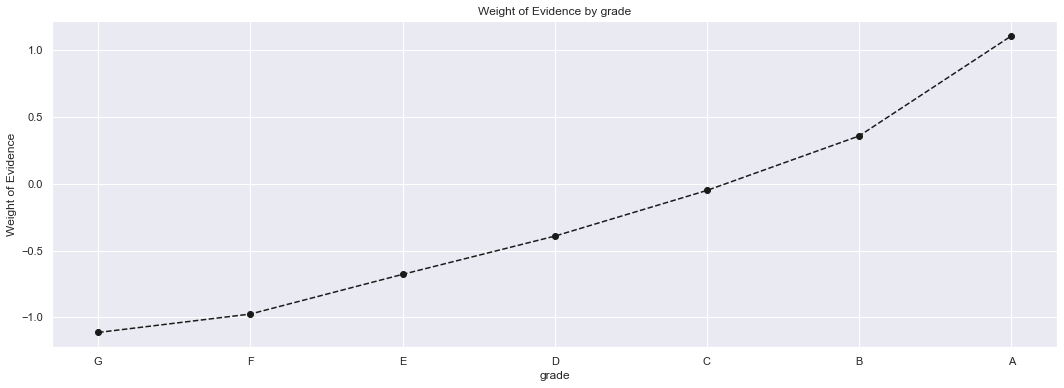

In [270]:
plot_by_woe(df_temp)